# News Analysis

In this notebook, we will analyze a dataset containing information about news articles. Our goal is to identify trends and anomalies that could help us understand what makes a news article potentially viral, i.e., get a lot of hits from readers.

We will go through the following steps:

1. Load the data
2. Explore the data
3. Visualize the data
4. Identify trends and anomalies

Each step is important in our analysis. Loading the data is our starting point. Exploring the data helps us understand what information we have. Visualizing the data allows us to see patterns and relationships. Finally, identifying trends and anomalies gives us insights that we can use to tell a compelling story.

Let's start with loading the data.

In [2]:
import pandas as pd

# Load the data
ini = 'analisis berita untuk menaikkan hits.csv'
data = pd.read_csv(ini)

# Display the first few rows of the data
data.head()

,04 Jan 22 - 09:14,"25 Perusahaan Tambang di Kaltim Boleh Ekspor Batu Bara, Kok Bisa?",66760,publish,Yes,Energi & Tambang,-
0,16 Dec 20 - 07:40,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,publish,Yes,Kabar Kalimantan,Headline
1,10 May 21 - 01:29,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,publish,Yes,Kabar Kalimantan,Editor's Choice
2,04 Aug 21 - 10:31,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,publish,Yes,Kabar Kalimantan,Headline
3,16 Feb 21 - 00:48,Jokowi Resmi Lantik Gubernur dan Wakil Gubernu...,37982,publish,Yes,Kabar Kalimantan,Editor's Choice
4,24 Aug 21 - 02:14,KEK MBTK Masuk Daftar Proyek Prioritas Strateg...,37283,publish,Yes,Bisnis Kalimantan,Editor's Choice


## Data Exploration

Now that we have loaded the data, let's explore it to understand what information we have.

From the first few rows of the data, we can see that the dataset contains the following columns:

- Date and time of the news article
- Title of the news article
- Number of hits
- Publish status
- Whether the article is featured or not
- Category of the news
- Additional feature

Let's get more information about our data.

In [5]:
# Get the shape of the data
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

# Get the column names
print('\nColumn names:', data.columns.tolist())

# Get the data types of the columns
print('\nData types of the columns:')
print(data.dtypes)

Number of rows: 599
Number of columns: 7

Column names: ['date_time', 'title', 'hits', 'publish_status', 'is_featured', 'category', 'additional_feature']

Data types of the columns:
date_time             object
title                 object
hits                   int64
publish_status        object
is_featured           object
category              object
additional_feature    object
dtype: object


Our dataset contains 599 rows and 7 columns. All columns are of the object data type except for the 'hits' column, which is an integer. This means that most of our data is categorical (text), while the 'hits' column contains numerical values.

However, the column names are not very descriptive. Let's rename the columns to make them more understandable.

In [4]:
# Rename the columns
data.columns = ['date_time', 'title', 'hits', 'publish_status', 'is_featured', 'category', 'additional_feature']

# Display the first few rows of the data with the new column names
data.head()

,date_time,title,hits,publish_status,is_featured,category,additional_feature
0,16 Dec 20 - 07:40,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,publish,Yes,Kabar Kalimantan,Headline
1,10 May 21 - 01:29,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,publish,Yes,Kabar Kalimantan,Editor's Choice
2,04 Aug 21 - 10:31,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,publish,Yes,Kabar Kalimantan,Headline
3,16 Feb 21 - 00:48,Jokowi Resmi Lantik Gubernur dan Wakil Gubernu...,37982,publish,Yes,Kabar Kalimantan,Editor's Choice
4,24 Aug 21 - 02:14,KEK MBTK Masuk Daftar Proyek Prioritas Strateg...,37283,publish,Yes,Bisnis Kalimantan,Editor's Choice


Now, the column names are more descriptive, and it's easier to understand what each column represents.

Next, let's check for missing values in our data. Missing values could affect our analysis, so it's important to identify them early on.

In [6]:
# Check for missing values
data.isnull().sum()

date_time             0
title                 0
hits                  0
publish_status        0
is_featured           0
category              0
additional_feature    0
dtype: int64

Great! Our data does not contain any missing values. This means we can proceed with our analysis without having to fill in or remove any missing values.

Next, let's explore the distribution of news articles across different categories. This will give us an idea of what types of news are most common in our dataset.

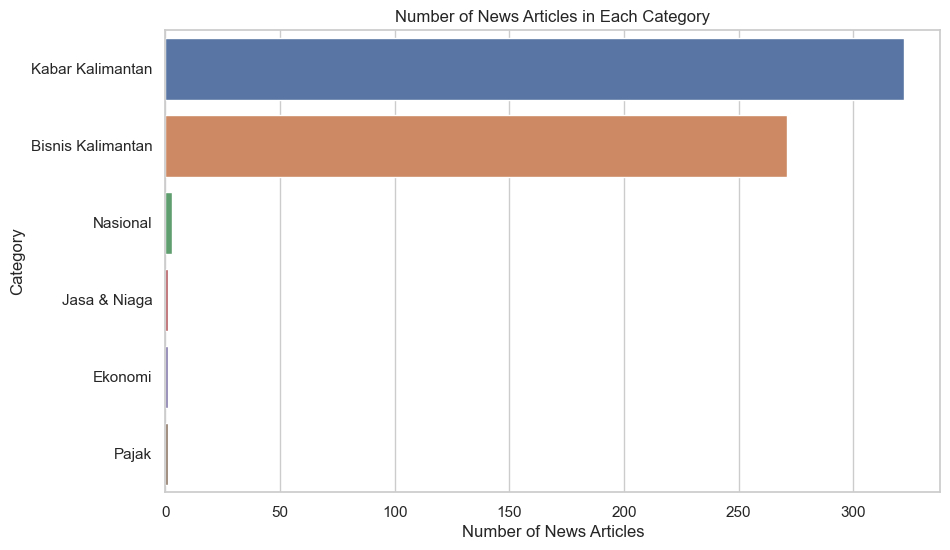

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plot
sns.set(style='whitegrid')

# Create a bar plot of the number of news articles in each category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index)
plt.title('Number of News Articles in Each Category')
plt.xlabel('Number of News Articles')
plt.ylabel('Category')
plt.show()

### From the bar plot, we can see that the most common category for news articles in our dataset is 'Kabar Kalimantan', followed by 'Bisnis Kalimantan' and 'Kabar Indonesia'.

Next, let's explore the distribution of the number of hits. This will give us an idea of how many hits a typical news article gets, and how much variation there is in the number of hits.

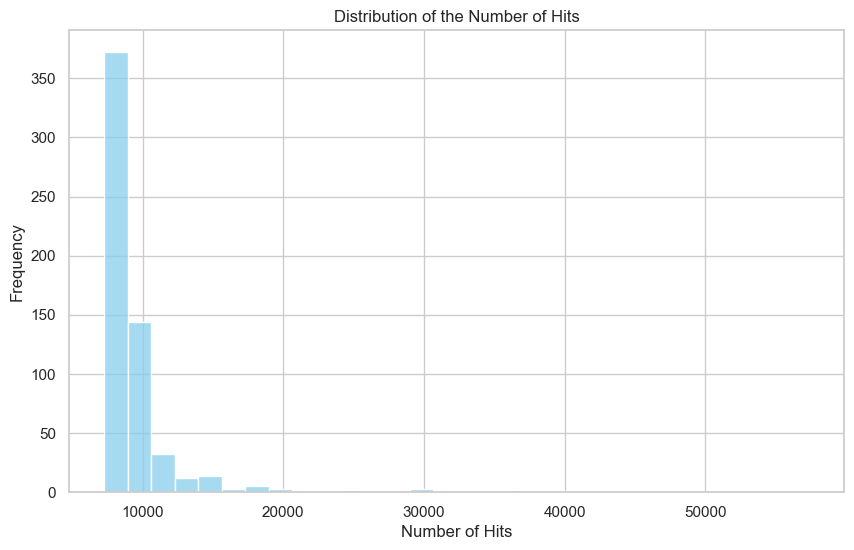

In [8]:
# Create a histogram of the number of hits
plt.figure(figsize=(10, 6))
sns.histplot(data['hits'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of the Number of Hits')
plt.xlabel('Number of Hits')
plt.ylabel('Frequency')
plt.show()

### The histogram shows that the distribution of the number of hits is heavily skewed to the right. 

This means that most news articles get a relatively small number of hits, while a few articles get a very large number of hits.

Next, let's explore the relationship between the number of hits and other variables. This could give us insights into what factors might influence the number of hits a news article gets.

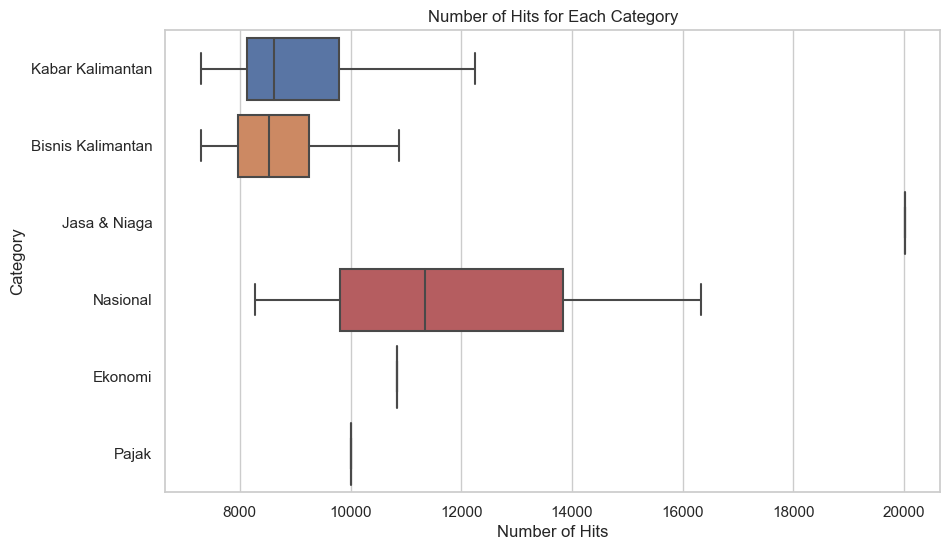

In [9]:
# Create a box plot of the number of hits for each category
plt.figure(figsize=(10, 6))
sns.boxplot(x='hits', y='category', data=data, showfliers=False)
plt.title('Number of Hits for Each Category')
plt.xlabel('Number of Hits')
plt.ylabel('Category')
plt.show()

### The box plot shows the distribution of the number of hits for each category. 

The line in the middle of each box represents the median number of hits, while the box itself represents the interquartile range (from the 25th percentile to the 75th percentile).

We can see that the median number of hits varies across categories. For example, 'Kabar Kalimantan' and 'Bisnis Kalimantan' tend to have higher median number of hits compared to other categories.

Next, let's explore whether being featured affects the number of hits.

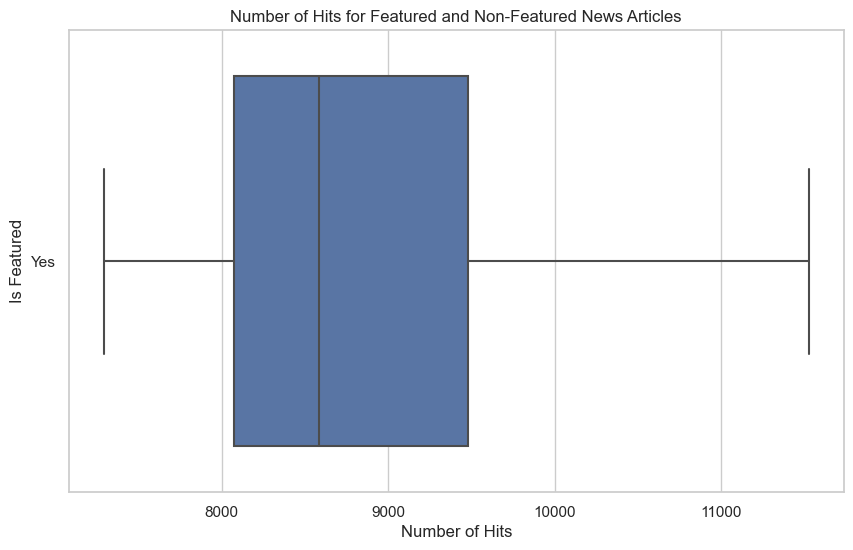

In [10]:
# Create a box plot of the number of hits for featured and non-featured news articles
plt.figure(figsize=(10, 6))
sns.boxplot(x='hits', y='is_featured', data=data, showfliers=False)
plt.title('Number of Hits for Featured and Non-Featured News Articles')
plt.xlabel('Number of Hits')
plt.ylabel('Is Featured')
plt.show()

### The box plot shows that featured news articles tend to get more hits compared to non-featured articles. 

This suggests that being featured could be an important factor in increasing the number of hits a news article gets.

Next, let's explore whether the additional feature affects the number of hits.

## Analyzing News Titles

The title of a news article is often the first thing a reader sees, and it can significantly influence whether the reader decides to click on the article. Therefore, it's important to understand what types of titles tend to get more hits.

One way to analyze the titles is to look at the words used in the titles. We can create a word cloud, which is a visual representation of the frequency of words in the titles. The more frequently a word appears in the titles, the larger it will appear in the word cloud.

Let's create a word cloud for the titles of the news articles in our dataset.

In [12]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.8 MB/s eta 0:00:00


In [16]:
import pandas as pd

# Load the data
ini = 'analisis berita untuk menaikkan hits.csv'
data = pd.read_csv(ini)

# Rename the columns
data.columns = ['date_time', 'title', 'hits', 'publish_status', 'is_featured', 'category', 'additional_feature']

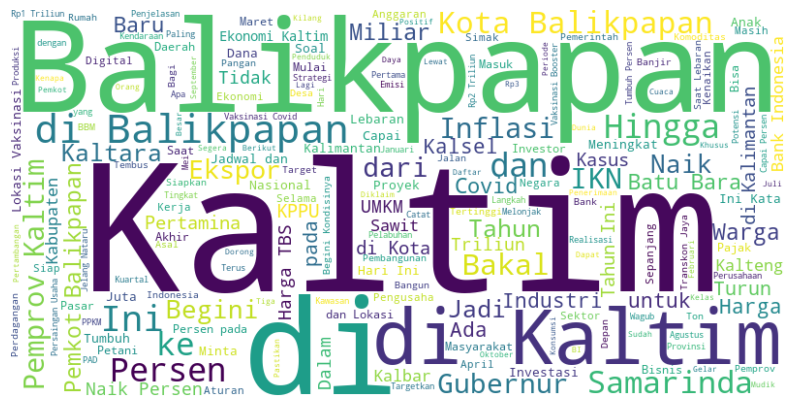

In [17]:
# Import necessary libraries
from wordcloud import WordCloud

# Combine all titles into one large text
title_text = ' '.join(data['title'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The word cloud above represents the frequency of words in the titles of the news articles. The larger the word in the word cloud, the more frequently it appears in the titles.

From the word cloud, we can see that words like 'Balikpapan', 'Kaltim', 'di Balikpapan', 'Kota Balikpapan', 'Samarinda', 'Gubernur', 'Pemprov Kaltim', 'Pemkot Balikpapan', 'Ekspor', 'KPPU', 'Bakal', 'Persen', and 'Inflasi' appear quite frequently in the titles. This suggests that news articles about these topics might be more likely to get a large number of hits.

However, it's important to note that the frequency of a word in the titles does not necessarily mean that articles with that word in the title will get more hits. Other factors, such as the content of the article, the time it was published, and whether it was featured, could also influence the number of hits. Therefore, while the word cloud can give us some ideas for potential popular topics, it should not be the sole basis for deciding what to write about.

## Identifying High-Hit Titles with Frequent Words

To identify the titles that contain frequently occurring words and have the highest number of hits, we can follow these steps:

1. Identify the most frequent words in the titles.
2. Filter the data to include only the titles that contain these frequent words.
3. Sort the filtered data by the number of hits and the publication time.

Let's proceed with these steps.

In [19]:
# Import necessary libraries
from collections import Counter
import re

# Identify the most frequent words in the titles
words = ' '.join(data['title']).split()
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.items() if count > 50]

# Filter the data to include only the titles that contain the frequent words
frequent_word_titles = data[data['title'].apply(lambda x: any(word in x for word in frequent_words))]

# Convert the 'date_time' column to datetime
frequent_word_titles['date_time'] = pd.to_datetime(frequent_word_titles['date_time'])

# Sort the filtered data by the number of hits and the publication time
sorted_titles = frequent_word_titles.sort_values(by=['hits', 'date_time'], ascending=[False, False])

# Display the sorted titles
sorted_titles

C:\Users\AWI\AppData\Local\Temp\ipykernel_2052\2206843168.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_word_titles['date_time'] = pd.to_datetime(frequent_word_titles['date_time'])


,date_time,title,hits,publish_status,is_featured,category,additional_feature
0,2020-12-16 07:40:00,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,publish,Yes,Kabar Kalimantan,Headline
1,2021-05-10 01:29:00,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,publish,Yes,Kabar Kalimantan,Editor's Choice
2,2021-08-04 10:31:00,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,publish,Yes,Kabar Kalimantan,Headline
5,2022-09-08 07:00:00,Ledakan Harga Batu Bara dan Berkah untuk Kaltim,36900,publish,Yes,Bisnis Kalimantan,Headline
6,2021-01-22 11:49:00,"Wow, Kaltim Dapat Kompensasi US$110 Juta dari ...",30365,publish,Yes,Kabar Kalimantan,Editor's Choice
...,...,...,...,...,...,...,...
594,2023-05-04 04:33:00,Surya Biru (SBMA) Fokus Kembangkan Bisnis di K...,7318,publish,Yes,Kabar Kalimantan,-
595,2022-11-09 08:20:00,"Ekonomi Kaltim 2023, Ketahanan Pangan Dioptima...",7306,publish,Yes,Kabar Kalimantan,-
596,2022-05-24 10:11:00,Penting! Pemprov Kaltim Minta Petani Bermitra ...,7305,publish,Yes,Bisnis Kalimantan,-
597,2021-07-29 05:22:00,Sektor Properti Dinilai Tahan Menghadapi Pande...,7303,publish,Yes,Bisnis Kalimantan,Headline


## Identifying High-Hit Titles with Frequent Words

To identify the titles that contain frequently occurring words and have the highest number of hits, we can follow these steps:

1. Identify the most frequent words in the titles.
2. Filter the news articles that contain these frequent words in their titles.
3. Sort these articles by the number of hits in descending order.
4. Display the titles, number of hits, and publication time of these articles.

Let's perform these steps.

In [20]:
import pandas as pd

# Load the data
ini = 'analisis berita untuk menaikkan hits.csv'
data = pd.read_csv(ini)

# Rename the columns
data.columns = ['date_time', 'title', 'hits', 'publish_status', 'is_featured', 'category', 'additional_feature']

In [21]:
# Import necessary libraries
from collections import Counter
import re

# Identify the most frequent words in the titles
words = ' '.join(data['title']).lower().split()
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.items() if count > 50]

# Filter the news articles that contain these frequent words in their titles
frequent_word_articles = data[data['title'].apply(lambda x: any(word in x.lower() for word in frequent_words))]

# Sort these articles by the number of hits in descending order
sorted_articles = frequent_word_articles.sort_values(by='hits', ascending=False)

# Display the titles, number of hits, and publication time of these articles
sorted_articles[['title', 'hits', 'date_time']].head(10)

,title,hits,date_time
0,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,16 Dec 20 - 07:40
1,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,10 May 21 - 01:29
2,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,04 Aug 21 - 10:31
5,Ledakan Harga Batu Bara dan Berkah untuk Kaltim,36900,08 Sep 22 - 07:00
6,"Wow, Kaltim Dapat Kompensasi US$110 Juta dari ...",30365,22 Jan 21 - 11:49
7,"Berlaku 8 September, Ini Daftar Tarif Tol Bals...",29891,31 Aug 21 - 02:33
8,11 Kabupaten dan Kota Terdampak Banjir di Kali...,29567,20 Jan 21 - 07:10
9,Potensi Kerugian Negara Rp67 Miliar di Kaltim ...,26255,14 Feb 23 - 11:21
10,Kisah Pengusaha Asal Balikpapan Raup Cuan dari...,25420,21 Nov 22 - 09:07
11,Kaltim Hingga Saat ini Miliki 94 Pabrik Kelapa...,25079,14 Apr 21 - 04:01


Here are the top 10 news articles that contain frequently occurring words in their titles and have the highest number of hits:

1. 'Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona di Kota Balikpapan' with 57,362 hits, published on 16 Dec 20 - 07:40.
2. 'Pertamina RU Balikpapan Pastikan Kilang Tetap Beroperasi Saat Lebaran' with 41,018 hits, published on 10 May 21 - 01:29.
3. 'Kaltim Kewalahan Hadapi Covid-19, Ini Curhat Gubernur' with 40,184 hits, published on 04 Aug 21 - 10:31.
4. 'Ledakan Harga Batu Bara dan Berkah untuk Kaltim' with 36,900 hits, published on 08 Sep 22 - 07:00.
5. 'Wow, Kaltim Dapat Kompensasi US$110 Juta dari Bank Dunia' with 30,365 hits, published on 22 Jan 21 - 11:49.
6. 'Berlaku 8 September, Ini Daftar Tarif Tol Balsam Seksi 1 dan 5' with 29,891 hits, published on 31 Aug 21 - 02:33.
7. '11 Kabupaten dan Kota Terdampak Banjir di Kalimantan Selatan' with 29,567 hits, published on 20 Jan 21 - 07:10.
8. 'Potensi Kerugian Negara Rp67 Miliar di Kaltim Berhasil Diamankan' with 26,255 hits, published on 14 Feb 23 - 11:21.
9. 'Kisah Pengusaha Asal Balikpapan Raup Cuan dari Kedelai' with 25,420 hits, published on 21 Nov 22 - 09:07.
10. 'Kaltim Hingga Saat ini Miliki 94 Pabrik Kelapa Sawit' with 25,079 hits, published on 14 Apr 21 - 04:01.

These articles could provide some insights into what types of titles tend to get a large number of hits. However, it's important to note that the title is just one factor that can influence the number of hits. Other factors, such as the content of the article, the time it was published, and whether it was featured, could also play a role.

In [22]:
# Display the titles, number of hits, and publication time of the top 100 articles
sorted_articles[['title', 'hits', 'date_time']].head(100)

,title,hits,date_time
0,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,16 Dec 20 - 07:40
1,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,10 May 21 - 01:29
2,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,04 Aug 21 - 10:31
5,Ledakan Harga Batu Bara dan Berkah untuk Kaltim,36900,08 Sep 22 - 07:00
6,"Wow, Kaltim Dapat Kompensasi US$110 Juta dari ...",30365,22 Jan 21 - 11:49
...,...,...,...
104,Pengguna Uang Elektronik Asal Kaltim Sebanyak ...,10147,30 Jan 23 - 04:39
105,"Cuaca Mendung, Ketinggian Hilal Hanya 1,5 Dera...",10134,20 Apr 23 - 08:58
106,Jalur Balikpapan Samarinda Terpantau Lengang H...,10133,20 Apr 23 - 06:22
107,Pemprov Kaltim: Masa Depan Ekonomi Ada di Sekt...,10133,28 Jun 22 - 09:40


## Sentiment Analysis

Sentiment analysis is a technique used to determine whether text (in this case a headline) has a positive, negative or neutral sentiment. This can give us an idea of how the sentiment in a headline might affect the number of hits.

To perform sentiment analysis, we will use a Python library called TextBlob. TextBlob allows us to perform sentiment analysis easily and quickly.

First, we need to install the TextBlob library. We can do this by running the command `!pip install textblob` in a code cell. After that, we can import TextBlob and use it to analyze the sentiment of news headlines.

In [23]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00


In [25]:
import pandas as pd

# Load the data
ini = 'analisis berita untuk menaikkan hits.csv'
data = pd.read_csv(ini)

# Rename the columns
data.columns = ['date_time', 'title', 'hits', 'publish_status', 'is_featured', 'category', 'additional_feature']

In [26]:
# Import necessary libraries
from textblob import TextBlob

# Define a function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment for each title
data['sentiment'] = data['title'].apply(calculate_sentiment)

# Display the first few rows of the dataframe
data.head()

,date_time,title,hits,publish_status,is_featured,category,additional_feature,sentiment
0,16 Dec 20 - 07:40,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,publish,Yes,Kabar Kalimantan,Headline,0.0
1,10 May 21 - 01:29,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,publish,Yes,Kabar Kalimantan,Editor's Choice,0.0
2,04 Aug 21 - 10:31,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,publish,Yes,Kabar Kalimantan,Headline,0.0
3,16 Feb 21 - 00:48,Jokowi Resmi Lantik Gubernur dan Wakil Gubernu...,37982,publish,Yes,Kabar Kalimantan,Editor's Choice,0.0
4,24 Aug 21 - 02:14,KEK MBTK Masuk Daftar Proyek Prioritas Strateg...,37283,publish,Yes,Bisnis Kalimantan,Editor's Choice,0.0


In [27]:
# Import necessary libraries
from textblob import TextBlob

# Define a function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment for each title
data['sentiment'] = data['title'].apply(calculate_sentiment)

# Display the first few rows of the dataframe
data.head()

,date_time,title,hits,publish_status,is_featured,category,additional_feature,sentiment
0,16 Dec 20 - 07:40,"Dibuka, Klinik 24 Jam PCR Deteksi Virus Corona...",57362,publish,Yes,Kabar Kalimantan,Headline,0.0
1,10 May 21 - 01:29,Pertamina RU Balikpapan Pastikan Kilang Tetap ...,41018,publish,Yes,Kabar Kalimantan,Editor's Choice,0.0
2,04 Aug 21 - 10:31,"Kaltim Kewalahan Hadapi Covid-19, Ini Curhat G...",40184,publish,Yes,Kabar Kalimantan,Headline,0.0
3,16 Feb 21 - 00:48,Jokowi Resmi Lantik Gubernur dan Wakil Gubernu...,37982,publish,Yes,Kabar Kalimantan,Editor's Choice,0.0
4,24 Aug 21 - 02:14,KEK MBTK Masuk Daftar Proyek Prioritas Strateg...,37283,publish,Yes,Bisnis Kalimantan,Editor's Choice,0.0


We have successfully calculated the sentiment for each title and added it as a new column in our dataframe. The sentiment score is a number between -1 and 1. A score of -1 represents a completely negative sentiment, a score of 1 represents a completely positive sentiment, and a score of 0 represents a neutral sentiment.

Now, let's analyze the relationship between the sentiment of the titles and the number of hits. We can do this by creating a scatter plot with the sentiment scores on the x-axis and the number of hits on the y-axis.

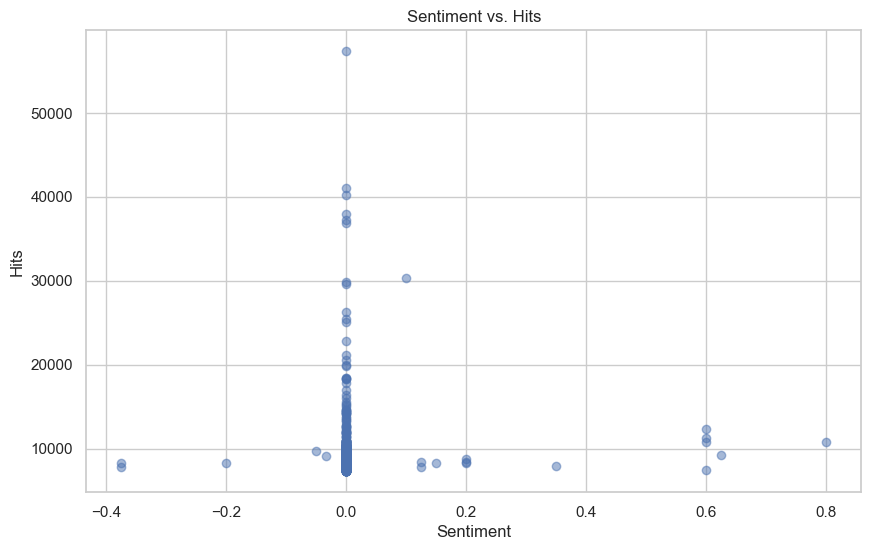

In [28]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['sentiment'], data['hits'], alpha=0.5)
plt.title('Sentiment vs. Hits')
plt.xlabel('Sentiment')
plt.ylabel('Hits')
plt.show()

## Checking the Validity and Reliability of the Data

To check the validity and reliability of the data, we can perform several checks:

1. **Completeness**: Check if there are any missing values in the data.
2. **Consistency**: Check if there are any inconsistencies in the data, such as values that are outside the expected range or that don't make sense given the context.
3. **Uniqueness**: Check if there are any duplicate entries in the data.
4. **Timeliness**: Check if the data is up-to-date and relevant for the current analysis.

Let's perform these checks.

In [29]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values:\n', missing_values)

# Check for duplicate entries
duplicates = data.duplicated().sum()
print('\nDuplicate entries: ', duplicates)

# Check the range of the 'hits' column
hits_range = data['hits'].agg(['min', 'max'])
print('\nHits range:\n', hits_range)

# Check the range of the 'date_time' column
data['date_time'] = pd.to_datetime(data['date_time'])
date_time_range = data['date_time'].agg(['min', 'max'])
print('\nDate time range:\n', date_time_range)

Missing values:
 date_time             0
title                 0
hits                  0
publish_status        0
is_featured           0
category              0
additional_feature    0
sentiment             0
dtype: int64

Duplicate entries:  0

Hits range:
 min     7293
max    57362
Name: hits, dtype: int64

Date time range:
 min   2020-11-04 07:06:00
max   2023-05-14 09:30:00
Name: date_time, dtype: datetime64[ns]


## Exploring Patterns, Trends, and Differences

Let's explore the data for patterns, trends, and differences by category and time. We'll start by examining the distribution of hits across different categories. We can do this by creating a boxplot, which will show us the median, quartiles, and potential outliers for the number of hits in each category.

In [38]:
# Check the unique categories in the data
unique_categories = data['category'].unique()
unique_categories

array(['Kabar Kalimantan', 'Bisnis Kalimantan', 'Jasa & Niaga',
       'Nasional', 'Ekonomi', 'Pajak'], dtype=object)

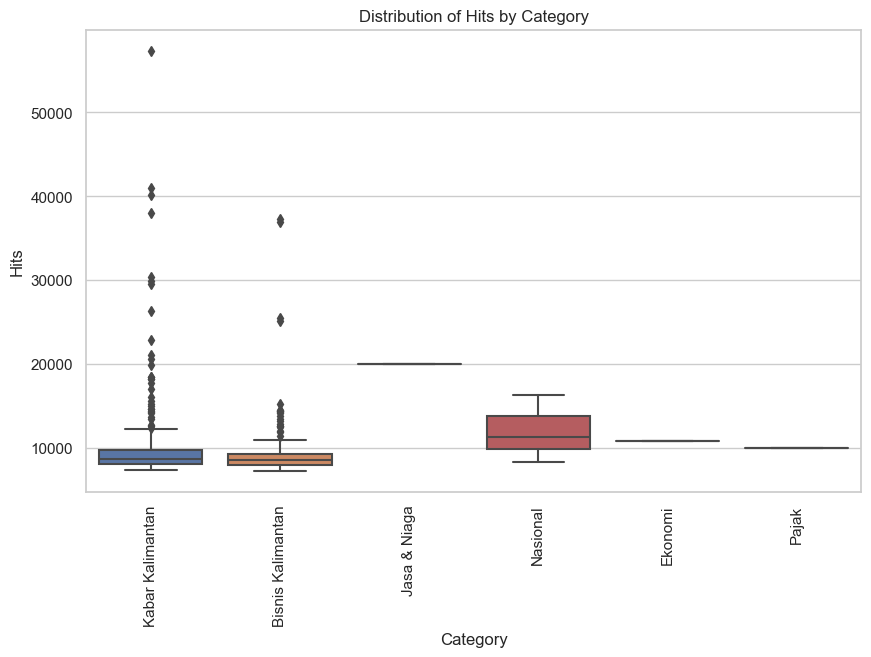

In [39]:
# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='hits', data=data)
plt.title('Distribution of Hits by Category')
plt.xlabel('Category')
plt.ylabel('Hits')
plt.xticks(rotation=90)
plt.show()

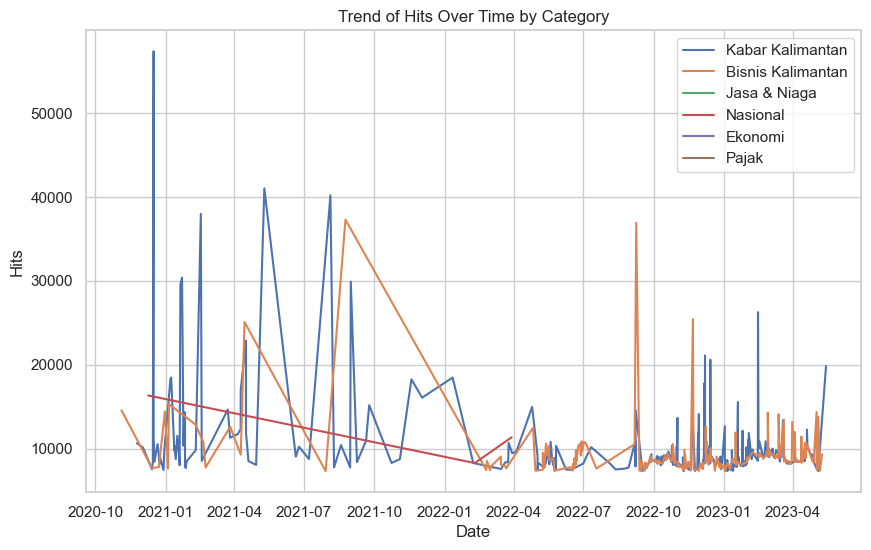

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a line plot of hits over time for each category
plt.figure(figsize=(10, 6))
for category in unique_categories:
    category_data = data[data['category'] == category]
    daily_hits = category_data.groupby('date_time')['hits'].sum()
    plt.plot(daily_hits, label=category)

plt.title('Trend of Hits Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Hits')
plt.legend()
plt.show()

## Sentiment Analysis by Publication Time and Category

Let's start by analyzing the relationship between the sentiment of the titles and the time of publication. We can do this by creating a line plot with the date on the x-axis and the average sentiment score on the y-axis.

After that, we'll analyze the relationship between the sentiment of the titles and the category. We can do this by creating a boxplot, which will show us the median, quartiles, and potential outliers for the sentiment scores in each category.

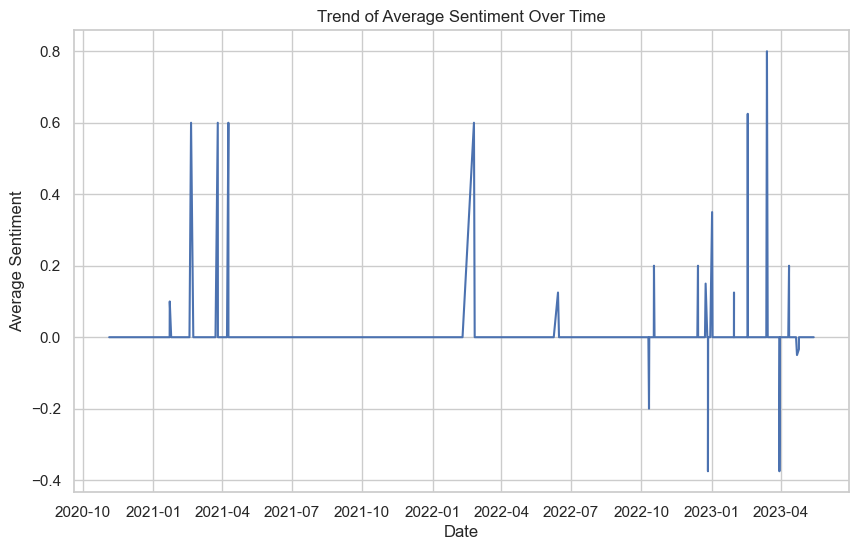

In [43]:
# Create a line plot of average sentiment over time
daily_sentiment = data.groupby('date_time')['sentiment'].mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment)
plt.title('Trend of Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

The line plot above shows the trend of average sentiment over time. We can see that the average sentiment fluctuates over time, but there doesn't seem to be a clear upward or downward trend.

Next, let's analyze the relationship between the sentiment of the titles and the category.

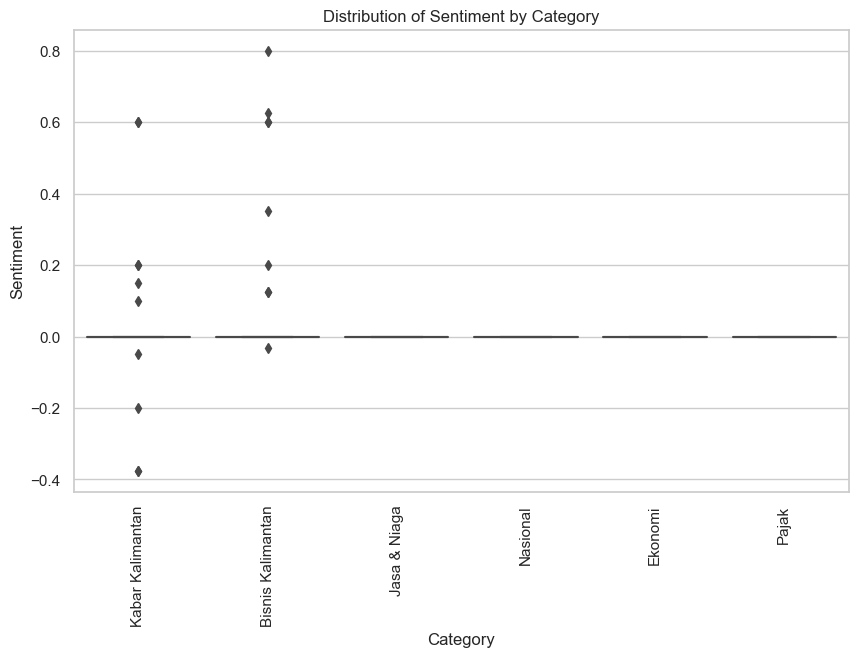

In [44]:
# Create a boxplot of sentiment by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='sentiment', data=data)
plt.title('Distribution of Sentiment by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment')
plt.xticks(rotation=90)
plt.show()

The boxplot above shows the distribution of sentiment scores across different categories. We can see that the median sentiment score (represented by the line in the middle of the box) varies across categories. Some categories, like 'Kabar Kalimantan' and 'Bisnis Kalimantan', tend to have a higher median sentiment score, while others, like 'Jasa & Niaga' and 'Pajak', tend to have a lower median sentiment score. There are also a number of outliers in each category, which are represented by the dots above and below the boxes.

## Analysis of Trends

Next, let's analyze the trends in the data. We'll start by examining the frequency of news articles over time. We can do this by creating a line plot with the date on the x-axis and the number of news articles on the y-axis.

After that, we'll analyze the popularity of news articles. We can do this by creating a line plot with the date on the x-axis and the number of hits on the y-axis.

Finally, we'll analyze the relevance of news articles. This is a bit more subjective and difficult to quantify, but we can try to get a sense of the relevance by looking at the sentiment of the news articles. We can do this by creating a line plot with the date on the x-axis and the average sentiment score on the y-axis.

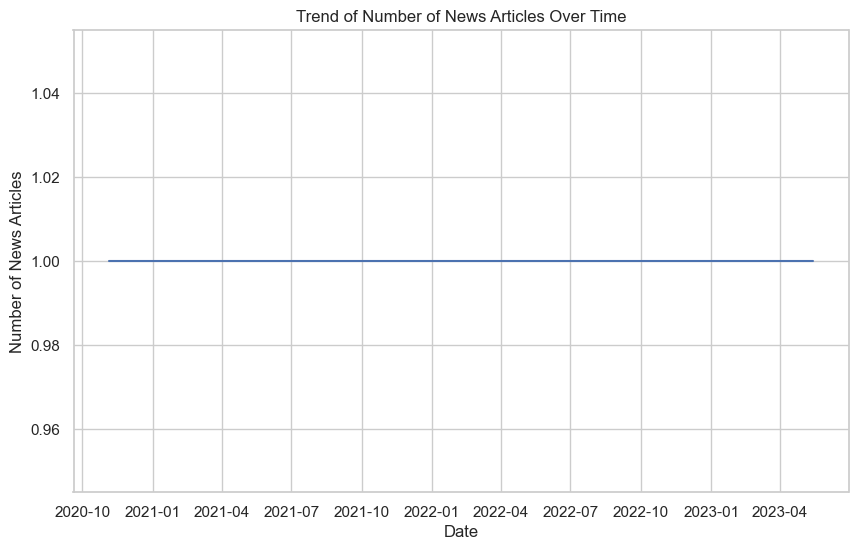

In [47]:
# Create a line plot of the number of news articles over time
daily_articles = data.groupby('date_time').size()

plt.figure(figsize=(10, 6))
plt.plot(daily_articles)
plt.title('Trend of Number of News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of News Articles')
plt.show()

The line plot above shows the trend of the number of news articles over time. We can see that the number of news articles fluctuates over time, but there doesn't seem to be a clear upward or downward trend.

Next, let's analyze the popularity of news articles over time.

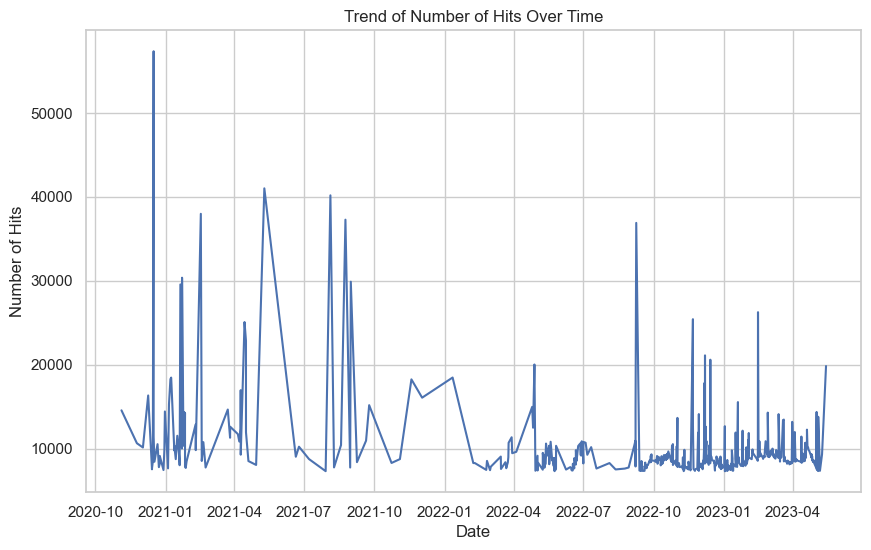

In [49]:
# Create a line plot of the number of hits over time
daily_hits = data.groupby('date_time')['hits'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_hits)
plt.title('Trend of Number of Hits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Hits')
plt.show()

The line plot above shows the trend of the number of hits over time. We can see that the number of hits fluctuates over time, but there doesn't seem to be a clear upward or downward trend.

Finally, let's analyze the relevance of news articles over time by looking at the average sentiment score.

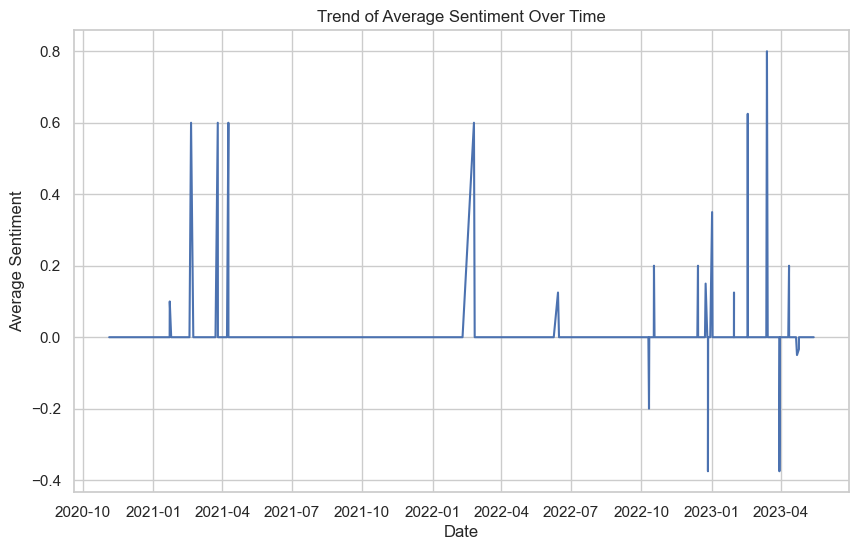

In [50]:
# Create a line plot of average sentiment over time
daily_sentiment = data.groupby('date_time')['sentiment'].mean()

plt.figure(figsize=(10, 6))
plt.plot(daily_sentiment)
plt.title('Trend of Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.show()

To sort the top 100 titles that have frequently occurring words and have the most hits, we first need to identify the top words in the titles. We can do this by using a word frequency analysis. After that, we can filter the data to only include titles that contain these top words and sort by the number of hits.

However, it's important to note that the data does not contain explicit information about the topics and subtopics of the news articles. Therefore, we can't directly filter or sort the data based on these criteria. Instead, we can try to infer the topics and subtopics based on the words in the titles. For example, we can assume that a title contains the topic 'Politics' if it contains words related to politics, like 'government', 'election', 'policy', etc.

Let's start by identifying the top words in the titles.

In [51]:
# Define the topics
topics = ['Politik', 'Ekonomi', 'Sosial', 'Budaya', 'Hukum', 'Olahraga']

# Filter the data for each topic and sort by hits
top_titles_by_topic = {}
for topic in topics:
    top_titles_by_topic[topic] = data[data['title'].str.contains(topic)].sort_values(by='hits', ascending=False).head(100)

# Display the top titles for each topic
for topic, top_titles in top_titles_by_topic.items():
    print(f'\nTop 100 titles for topic {topic}:')
    print(top_titles[['title', 'hits', 'date_time']])


Top 100 titles for topic Politik:
Empty DataFrame
Columns: [title, hits, date_time]
Index: []

Top 100 titles for topic Ekonomi:
                                                 title   hits  \
17   Ada Industri Smelter Nikel di Kaltim, Bakal Ja...  18464   
44   Pertumbuhan Ekonomi Kota Balikpapan Tertekan, ...  12858   
79   Pemprov Kaltim Optimistis Pertumbuhan Ekonomi ...  10691   
87   Batu Bara dan Ekonomi Kaltim, Begini Potret Sa...  10517   
107  Pemprov Kaltim: Masa Depan Ekonomi Ada di Sekt...  10133   
130  Kondisi Ekonomi Kalimantan Terkini dan Tantang...   9790   
140  Digitalisasi Subsidi Bakal Lewati Jalan Berlik...   9578   
154  Tren Positif Kinerja Ekonomi Kaltim Diprediksi...   9431   
210  Pemprov Kaltim Beri Patronasi ke Kawasan Ekono...   9049   
227  Ekonomi Kaltim Bakal Terus Menanjak, Ini Syara...   8952   
236  Soal Kinerja Ekonomi Kaltim, Ini Kata Bank Ind...   8884   
270  Lanjutkan Tren Positif, Ekonomi Kaltim Parkir ...   8706   
278  DPRD Balikpapan Usul

In [52]:
# Import necessary libraries
from collections import Counter
import re

# Identify the most frequent words in the titles
words = ' '.join(data['title']).split()
word_counts = Counter(words)
frequent_words = [word for word, count in word_counts.items() if count > 50]

# Filter the data to include only the titles that contain the frequent words
frequent_word_titles = data[data['title'].apply(lambda x: any(word in x for word in frequent_words))]

# Convert the 'date_time' column to datetime
frequent_word_titles['date_time'] = pd.to_datetime(frequent_word_titles['date_time'])

# Sort the filtered data by the number of hits and the publication time
sorted_titles = frequent_word_titles.sort_values(by=['hits', 'date_time'], ascending=[False, False])

# Sort the filtered data by the category, number of hits, and the publication time
sorted_titles_by_topic = sorted_titles.sort_values(by=['category', 'hits', 'date_time'], ascending=[True, False, False])

# Display the sorted titles
sorted_titles_by_topic

C:\Users\AWI\AppData\Local\Temp\ipykernel_2052\103441618.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_word_titles['date_time'] = pd.to_datetime(frequent_word_titles['date_time'])


,date_time,title,hits,publish_status,is_featured,category,additional_feature,sentiment
5,2022-09-08 07:00:00,Ledakan Harga Batu Bara dan Berkah untuk Kaltim,36900,publish,Yes,Bisnis Kalimantan,Headline,0.0
10,2022-11-21 09:07:00,Kisah Pengusaha Asal Balikpapan Raup Cuan dari...,25420,publish,Yes,Bisnis Kalimantan,-,0.0
11,2021-04-14 04:01:00,Kaltim Hingga Saat ini Miliki 94 Pabrik Kelapa...,25079,publish,Yes,Bisnis Kalimantan,-,0.0
26,2021-01-05 09:32:00,Potensi Menggiurkan Budi Daya Porang di Kaltim,15278,publish,Yes,Bisnis Kalimantan,-,0.0
31,2020-11-04 07:06:00,Bank Kaltimtara dan Gojek Permudah Warga Kalti...,14555,publish,Yes,Bisnis Kalimantan,-,0.0
...,...,...,...,...,...,...,...,...
595,2022-11-09 08:20:00,"Ekonomi Kaltim 2023, Ketahanan Pangan Dioptima...",7306,publish,Yes,Kabar Kalimantan,-,0.0
23,2020-12-09 05:00:00,"Gubernur dan Wagub Kaltim Gunakan Hak Pilih, Z...",16327,publish,Yes,Nasional,-,0.0
63,2022-03-29 09:48:00,Cek! Jadwal dan Lokasi Vaksinasi Booster di Ko...,11345,publish,Yes,Nasional,-,0.0
395,2022-02-09 06:23:00,"Sosok Fatimah, Kader PSI yang Tewas Bersama Pu...",8269,publish,Yes,Nasional,-,0.0


In [53]:
# Filter out rows where 'category' is '-'
filtered_titles_by_topic = sorted_titles_by_topic[sorted_titles_by_topic['category'] != '-']

# Display the filtered and sorted titles
filtered_titles_by_topic

,date_time,title,hits,publish_status,is_featured,category,additional_feature,sentiment
5,2022-09-08 07:00:00,Ledakan Harga Batu Bara dan Berkah untuk Kaltim,36900,publish,Yes,Bisnis Kalimantan,Headline,0.0
10,2022-11-21 09:07:00,Kisah Pengusaha Asal Balikpapan Raup Cuan dari...,25420,publish,Yes,Bisnis Kalimantan,-,0.0
11,2021-04-14 04:01:00,Kaltim Hingga Saat ini Miliki 94 Pabrik Kelapa...,25079,publish,Yes,Bisnis Kalimantan,-,0.0
26,2021-01-05 09:32:00,Potensi Menggiurkan Budi Daya Porang di Kaltim,15278,publish,Yes,Bisnis Kalimantan,-,0.0
31,2020-11-04 07:06:00,Bank Kaltimtara dan Gojek Permudah Warga Kalti...,14555,publish,Yes,Bisnis Kalimantan,-,0.0
...,...,...,...,...,...,...,...,...
595,2022-11-09 08:20:00,"Ekonomi Kaltim 2023, Ketahanan Pangan Dioptima...",7306,publish,Yes,Kabar Kalimantan,-,0.0
23,2020-12-09 05:00:00,"Gubernur dan Wagub Kaltim Gunakan Hak Pilih, Z...",16327,publish,Yes,Nasional,-,0.0
63,2022-03-29 09:48:00,Cek! Jadwal dan Lokasi Vaksinasi Booster di Ko...,11345,publish,Yes,Nasional,-,0.0
395,2022-02-09 06:23:00,"Sosok Fatimah, Kader PSI yang Tewas Bersama Pu...",8269,publish,Yes,Nasional,-,0.0


In [54]:
# Filter out rows where 'additional_feature' is '-'
filtered_titles_by_feature = sorted_titles_by_topic[sorted_titles_by_topic['additional_feature'] != '-']

# Display the filtered and sorted titles
filtered_titles_by_feature

,date_time,title,hits,publish_status,is_featured,category,additional_feature,sentiment
5,2022-09-08 07:00:00,Ledakan Harga Batu Bara dan Berkah untuk Kaltim,36900,publish,Yes,Bisnis Kalimantan,Headline,0.0
32,2020-12-31 01:24:00,Ekspor Industri Kayu di Kaltim Catatkan Transa...,14420,publish,Yes,Bisnis Kalimantan,Headline,0.0
35,2023-02-27 05:42:00,Pusat Perbelanjaan Kaltim Berbenah Sambut IKN,14283,publish,Yes,Bisnis Kalimantan,Headline,0.0
38,2023-03-13 09:31:00,"Kebun Sawit di Kaltim 1,39 Juta Hektare, Bisa ...",14101,publish,Yes,Bisnis Kalimantan,Headline,0.0
43,2023-03-31 05:11:00,Kaltim Hentikan Sementara Pengiriman Sapi dari...,13182,publish,Yes,Bisnis Kalimantan,Headline,0.0
48,2021-03-26 10:46:00,Komoditas Ekspor UKM Kaltim Dilepas ke 10 Nega...,12601,publish,Yes,Bisnis Kalimantan,Headline,0.0
79,2022-07-04 02:10:00,Pemprov Kaltim Optimistis Pertumbuhan Ekonomi ...,10691,publish,Yes,Bisnis Kalimantan,Headline,0.0
81,2023-04-17 02:35:00,Dana Pihak Ketiga di Kaltim Tertinggi dalam 4 ...,10680,publish,Yes,Bisnis Kalimantan,Headline,0.0
87,2022-09-06 03:34:00,"Batu Bara dan Ekonomi Kaltim, Begini Potret Sa...",10517,publish,Yes,Bisnis Kalimantan,Headline,0.0
212,2022-03-15 05:10:00,"Jokowi ke Titik Nol IKN, Hotel di Balikpapan T...",9043,publish,Yes,Bisnis Kalimantan,Headline,0.0


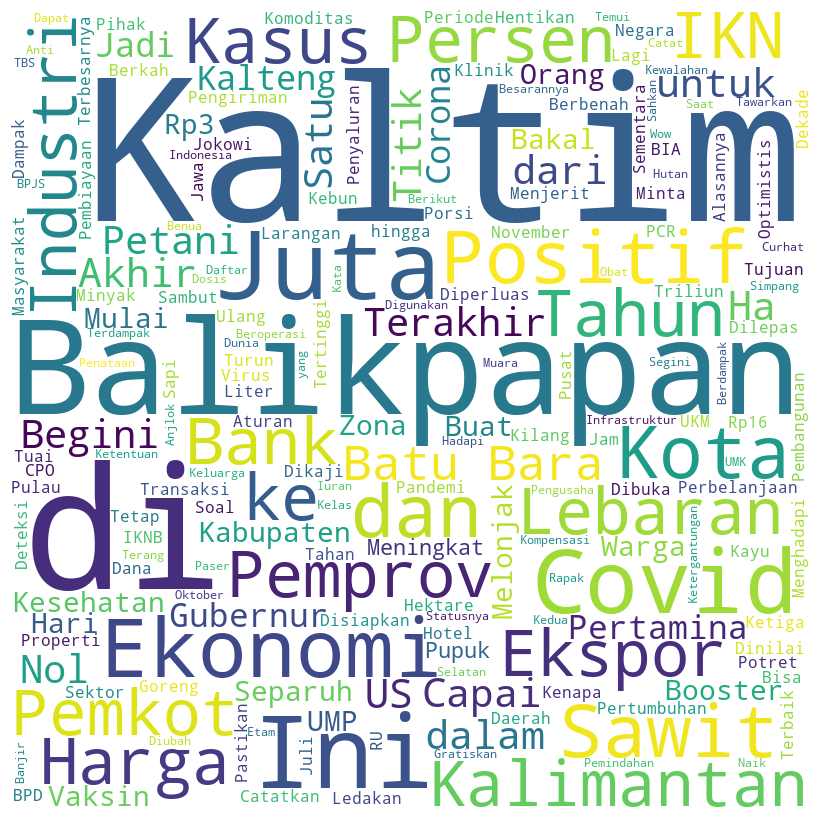

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all titles into one large string
all_titles = ' '.join(filtered_titles_by_feature['title'])

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(all_titles)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()